In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
engine

Engine(sqlite:///Resources/hawaii.sqlite)

In [5]:
# reflect an existing database into a new model
#data = engine.execute("SELECT * FROM hawaii")
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)


In [6]:
# View all of the classes that automap found
Base.classes.keys()


['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
#Measurement
Station = Base.classes.station
#Station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)
session

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
most_recent = session.query(Measurement.date).order_by(Measurement.date.desc()).first() 

most_recent
print(f'The most recent date in the data set is {most_recent}')
most_recent

The most recent date in the data set is ('2017-08-23',)


('2017-08-23')

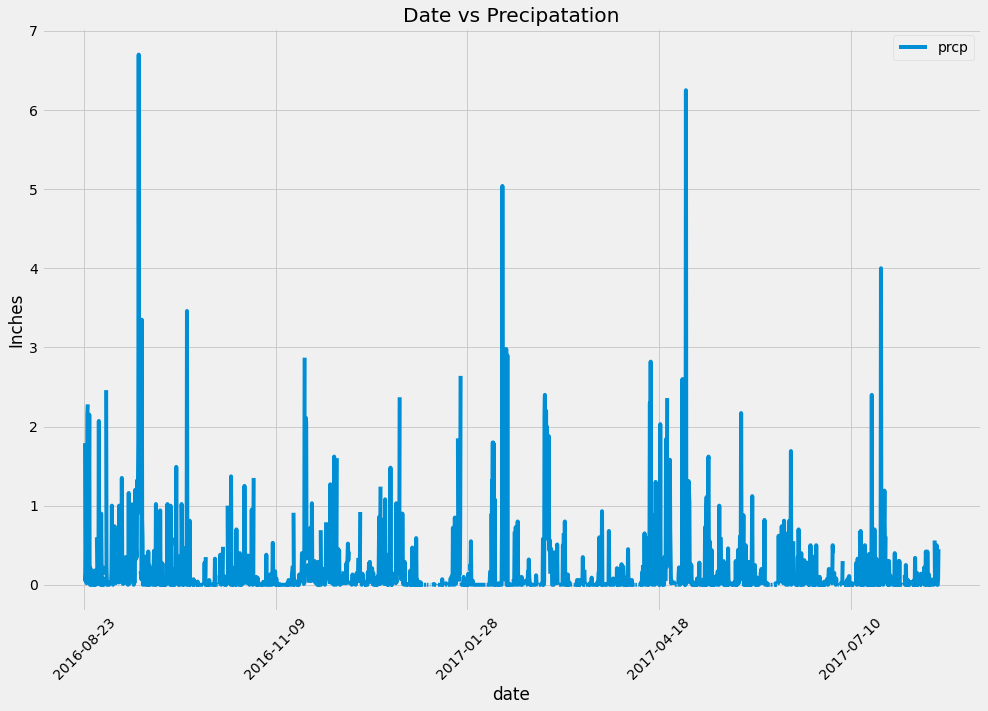

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
previous_year = dt.date(2017,8,23) - dt.timedelta(days=365)
#previous_year
# Perform a query to retrieve the date and precipitation scores
twelve_month_data = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= previous_year).all()
# SELECT date, prcp FROM Measurement WHERE date >= previous_year 
#twelve_month_data

# Save the query results as a Pandas DataFrame and set the index to the date column
date_df = pd.DataFrame(twelve_month_data, columns=['date','prcp'])
# date_df

# Sort the dataframe by date
date_df = date_df.sort_values('date')
# date_df
# Use Pandas Plotting with Matplotlib to plot the data
date_df.plot(x='date', y= 'prcp', figsize=(15,10))
plt.title("Date vs Precipatation")
plt.ylabel("Inches")
plt.xticks(rotation=45)

plt.savefig("Date vs Precipatation.png")

plt.show()



In [11]:
# Use Pandas to calculate the summary statistics for the precipitation data
summary_statistics = date_df.describe()
summary_statistics

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number of stations in the dataset
# SELECT COUNT(station) FROM Station 
station_number = session.query(func.count(Station.station)).all()
station_number


[(9)]

In [13]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
# SELECT station, COUNT(station) FROM Measurement GROUP BY station ORDER BY COUNT(station) desc
active_stations = session.query(Measurement.station, func.count(Measurement.station)).\
group_by(Measurement.station).\
order_by(func.count(Measurement.station).desc()).all()
active_stations

print(f'The most active stations are: {active_stations}')
active_stations

The most active stations are: [('USC00519281', 2772), ('USC00519397', 2724), ('USC00513117', 2709), ('USC00519523', 2669), ('USC00516128', 2612), ('USC00514830', 2202), ('USC00511918', 1979), ('USC00517948', 1372), ('USC00518838', 511)]


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station = active_stations[0][0]
most_active_station

print(f'The most active station is {most_active_station}.')
most_active_station

The most active station is USC00519281.


'USC00519281'

In [15]:
# Lowest temperature
lowest_temperature = session.query(func.min(Measurement.tobs)).filter(Measurement.station == most_active_station).all()
lowest_temperature

[(54.0)]

In [16]:
# highest temperature
highest_temperature = session.query(func.max(Measurement.tobs)).filter(Measurement.station == most_active_station).all()
highest_temperature

[(85.0)]

In [17]:
# Average temperature
avgerage_temperature = session.query(func.avg(Measurement.tobs)).filter(Measurement.station == most_active_station).all()
avgerage_temperature

[(71.66378066378067)]

In [18]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
tob_data_12months = session.query(Measurement.date, Measurement.station, Measurement.tobs)\
                        .filter(Measurement.station == 'USC00519281')\
                        .filter(Measurement.date >= previous_year).all()
tob_data_12months

[('2016-08-23', 'USC00519281', 77.0),
 ('2016-08-24', 'USC00519281', 77.0),
 ('2016-08-25', 'USC00519281', 80.0),
 ('2016-08-26', 'USC00519281', 80.0),
 ('2016-08-27', 'USC00519281', 75.0),
 ('2016-08-28', 'USC00519281', 73.0),
 ('2016-08-29', 'USC00519281', 78.0),
 ('2016-08-30', 'USC00519281', 77.0),
 ('2016-08-31', 'USC00519281', 78.0),
 ('2016-09-01', 'USC00519281', 80.0),
 ('2016-09-02', 'USC00519281', 80.0),
 ('2016-09-03', 'USC00519281', 78.0),
 ('2016-09-04', 'USC00519281', 78.0),
 ('2016-09-05', 'USC00519281', 78.0),
 ('2016-09-06', 'USC00519281', 73.0),
 ('2016-09-07', 'USC00519281', 74.0),
 ('2016-09-08', 'USC00519281', 80.0),
 ('2016-09-09', 'USC00519281', 79.0),
 ('2016-09-10', 'USC00519281', 77.0),
 ('2016-09-11', 'USC00519281', 80.0),
 ('2016-09-12', 'USC00519281', 76.0),
 ('2016-09-13', 'USC00519281', 79.0),
 ('2016-09-14', 'USC00519281', 75.0),
 ('2016-09-15', 'USC00519281', 79.0),
 ('2016-09-16', 'USC00519281', 78.0),
 ('2016-09-17', 'USC00519281', 79.0),
 ('2016-09-1

In [19]:
#create a dataframe
tob_data_12months_df = pd.DataFrame(tob_data_12months, columns=['date', 'tobs', 'prcp'])
tob_data_12months_df.set_index('date', inplace=True)
tob_data_12months_df.head()

,tobs,prcp
date,,
2016-08-23,USC00519281,77.0
2016-08-24,USC00519281,77.0
2016-08-25,USC00519281,80.0
2016-08-26,USC00519281,80.0
2016-08-27,USC00519281,75.0


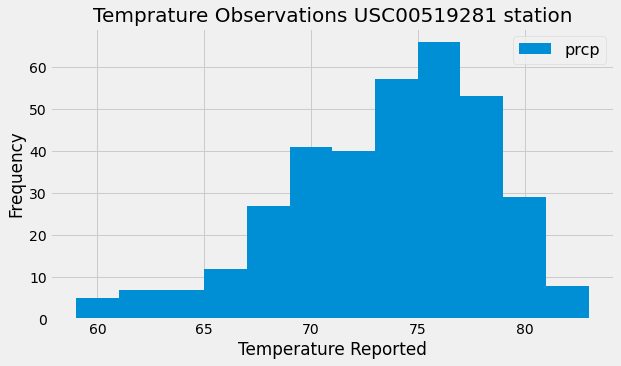

In [25]:
# Plot the tob_data_12months_df as a histogram
tob_data_12months_df_histrogram = tob_data_12months_df.plot(kind='hist', bins=12, figsize=(9,5))
plt.xlabel('Temperature Reported')
plt.title('Temprature Observations USC00519281 station', fontsize=20)
plt.legend(bbox_to_anchor=(1,1), fontsize=16)
plt.savefig("bins=12")
plt.show()

# Close session

In [24]:
# Close Session
session.close()